<a href="https://colab.research.google.com/github/sai-bharghav/Deep-Learning/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore an example of PyTorch end-toend workflow

In [1]:
what_were_covering ={1:"data (prepare and loading)",
                     2:"building the model",
                     3:'fitting the model to data',
                     4:'making predictions and evaluating a model(inference)',
                     5:'saving and loading a model',
                     6:'putting it all together'}

In [2]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check pytorch version
torch.__version__

'2.2.1+cu121'

![Image](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png)

## 1. Data (preparing and loading)

Data can ba almost anything.. in machine learning

* Excel Spreadsheets
* Images of any kind
* Videos
* Audio like songs
* DNA
* Text

Macine learning is a game of two parts
1. Get data into numerical representation
2. Build a model to learn patterns in that numerical representation


To showcase this, let's create some *known* data using the linear regression formula

We'll use a linear regression formula to make a straight line with known **parameters**

In [3]:
# Create known parameteres
weight =0.7
bias =0.3

# Create some data
start = 0
end =1
step =0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)# to get the shape [50,1]
y = weight*X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y),X.shape

(50, 50, torch.Size([50, 1]))

### Splitting data into training and test datasets

Let's create a training and test dataset with out data

In [5]:
# Create a train/test split

train_split = int(0.8*len(X))
X_train, y_train =X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in
"Visualize, Visualize,Visualize"


In [6]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  Plots, training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue

  plt.scatter(train_data,train_labels,c='b',s=4,label='Training data')

  # Plt test in green
  plt.scatter(test_data, test_labels, c='g',s=4,label='Testing data')

  # Are there predictions?
  if predictions is not None:
    # Plt the predictions if they exist
    plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')

  plt.legend(prop={'size':14})

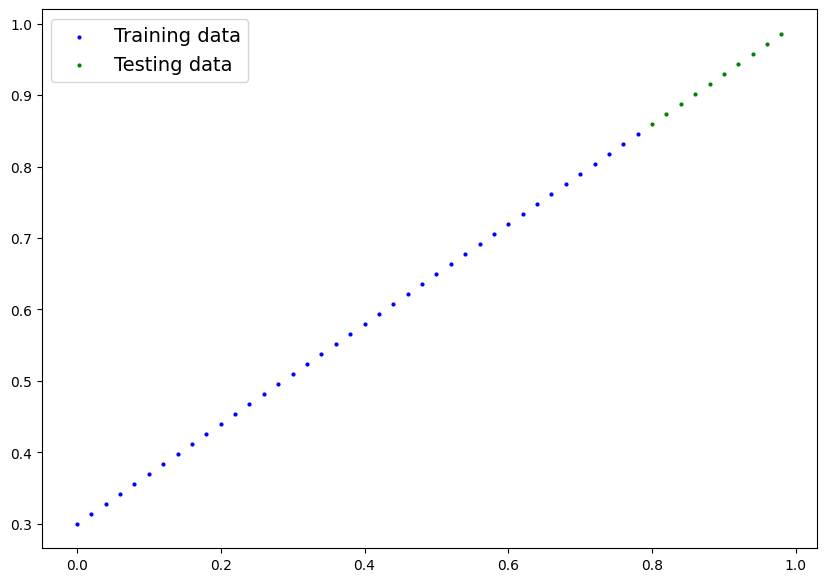

In [7]:
plot_prediction()

## Build model

Our First PyTorch model

we are going to use classes and OOPS so here is the link for OOPS in Python
https://realpython.com/python3-object-oriented-programming/

What our model does
* Start with random values (weights&bias)
* Look at training data and adjust the random values to better represent the data(ideal values)


Hwo does it do so?
Through two main algorithms:
1. Gradient descent
2. Back propogation

In [8]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): #<- almost everything in PyTorch inherits from nn.Module ( base class for all neural network modules)
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))

  # Forward method to define the computation in themodel
  def forward(self,x:torch.Tensor) -> torch.Tensor:#<- "x" is the input data
    return self.weights*x+self.bias # this is the linear regression formula

### PyTorch model building essentials

* `torch.nn` - contains of the buildings for computational graphs (another word neural networks)
* `torch.nn.Parameter` - what parameter should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.Module` - The base for all neural network modules, if you sub class it you should override the forward() method
* `torch.optim` - this where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All nn.Module subclasses require you to override this method. *This method defines what happens in the forward computation*

For getting the data ready we make use of the following modules
* `torchvision.transformas`
* `torch.utils.data.Dataset`
* `torch.utils.data.DataLoader`

For building a model
* `torch.nn`
* `toch.nn.Module`
* `torchvision.models`

For optimizer
* `torch.optim`

Evaluate the model
* `torchmetrics`

Improve the model through experimentaion
* `torch.utils.tensorboard`

### Checking the contents of our pytorch model

Now we've created our model we see what it does

We can check our model Parameters or what is inside using `.paramters()`


In [9]:
# Create a random seed
torch.manual_seed(42)

# Createa an instance of the model (this is a subclass of nn.Module)
model_0=LinearRegressionModel()

model_0

LinearRegressionModel()

In [10]:
# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List the named parameters
model_0.state_dict() # we get the variables defined in the class

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

###Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it is going to run the `forward()` method

In [12]:
# Make predicitions with model
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

# You can also do something similar
with torch.no_grad():
  y_preds = model_0(X_test)
y_preds
y_initial_preds = y_preds

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

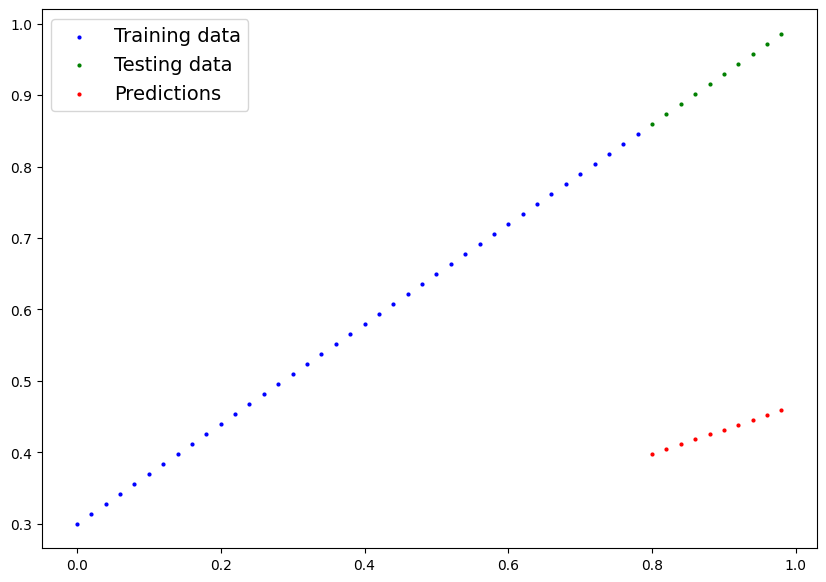

In [14]:
plot_prediction(predictions = y_preds)

Our model did bad on predcitions on the first time we can also do
`y_preds = model_0(X_test)` aand then see the `y_preds`. Let us ee what the difference is




In [15]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

Both are similar but what is the difference is that we have a `grad_fn = <AddBackward0>`
- The `inference_mode()` will turn off the backward propogation so pytorch will keep track off less data

See more on inference mode here - https://x.com/PyTorch/status/1437838231505096708?s=20

### 3. Train Model

The whole idea training for a model to move from some unknown parameters to some known parameters

Or in simple terms, From a porr representation of data to a better representation of the data


One way to measure how poor or how wrong you model performs we have to use a loss function


* NOTE : Loss function may also be called cost function or criterion in different areas

Things we need to train :

* **Loss function** A function to measure how wrong your model's predictions are to the ideal outputs
* **Optimizer** takes into account the loss of a model's parameters (eg: weights & bias) to improve the loss function
    - Inside the optimizer you'll often have to set tow parameters:
    * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
    * `lr`(learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes

And specifically for PyTorch we need a
* training loop
* testing loop

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
# Chekc out or model paratmers (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# Setup a Loss function
loss_fn = nn.L1Loss()

# Setup an Optimizer(stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01)# lr = Learning rate - possibly the most important hyperparameter

**Q** Which loss function and optimizer should I use?

**A** This will be problem specific, but with experience we will get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice,

But for a classfication problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function `nn.BCELoss()` ( Binary cross entropy loss)

## Buidling a training loop in PyTorch( training and testing loop)

A couple of thinigs we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving thorugh our model's `forward` to make predictions on data
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward  - move backwards through the netowrk to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [19]:
torch.manual_seed(42)
# An epcoh is one loop through the data.. (this is a hyperparameter because we've set it )
epochs = 1000

# Track the parameters
epoch_count = []
loss_values = []
test_loss_values =[]

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode (Pytorch has different modes and one of them is training mode)
  model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients

  #Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss=loss_fn(y_pred,y_train)

  # 3.Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5.Step the optimizer(perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate throught the loop so.. we have to zero them above in step 3

  # Testing
  model_0.eval() # turns off settings which are not needed for evaluation
  with torch.inference_mode(): # turns off gradient tracking and couple of more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test)

  if epoch %10 ==0 :
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")

  # Print out the model_0.state_dict()
  #print(model_0.state_dict())

Epoch: 0 | Test: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Test: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Test: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Test: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Test: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Test: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Test: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Test: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Test: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Test: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Test: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Test: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Test: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Test: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [21]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

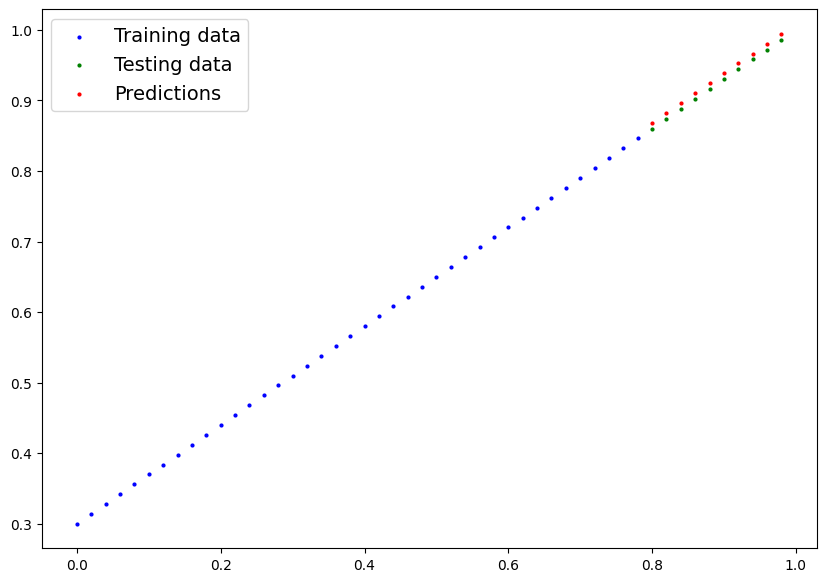

In [22]:
plot_prediction(predictions=y_preds_new)

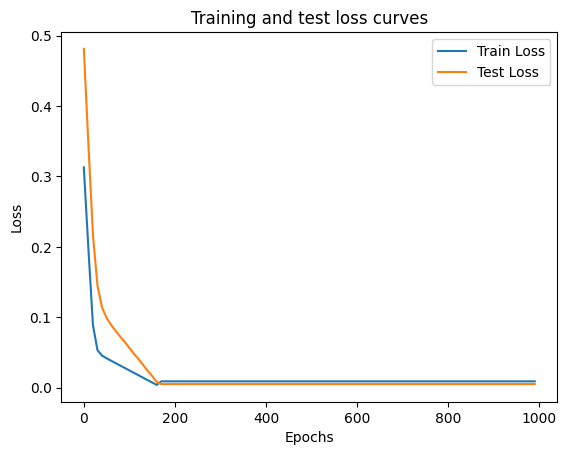

In [23]:
# Plt the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train Loss')# We cannot use he loss values since it is a tesnor and requires Gradient backward, so we have to tweak it
plt.plot(epoch_count, test_loss_values, label = 'Test Loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

## Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()`- allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary


In [24]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path
MODEL_NAME = 'pytorch_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH/ MODEL_NAME
MODEL_SAVE_PATH


# 3. Save the model State dict
print(f"Saving mdoel to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving mdoel to : models/pytorch_model_0.pth


In [25]:
!ls l models

ls: cannot access 'l': No such file or directory
models:
pytorch_model_0.pth


## Loading a PyTorch Model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [27]:
# To load in a saved state_dict() we have to instantiate a new instace of our model class
loaded_model_0 = LinearRegressionModel()


# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [28]:
loaded_model_0.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [30]:
# Compare loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 6. Putting it all together



In [31]:
# Importing PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt


# Chekc pytorch version
torch.__version__

'2.2.1+cu121'

Create deveice-agnostic code


In [32]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'using Device : {device}')

using Device : cpu


## 6.1 Data

In [45]:
# create some data using the linear regression formulae
weight = 0.7
bias = 0.3


# Create range values
start = 0
ed = 1
step=0.02

# Create X and y
X= torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X +bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [46]:
# Split data
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

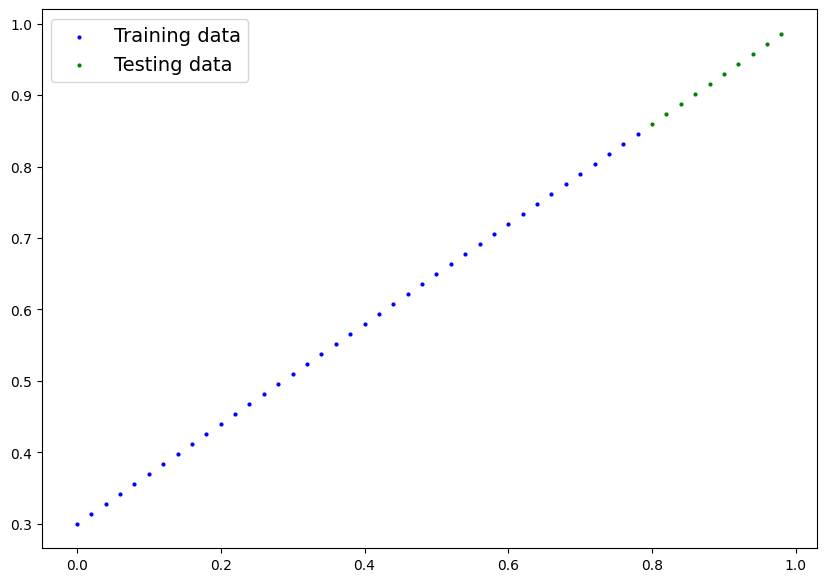

In [47]:
plot_prediction(X_train,y_train,X_test,y_test)

## 6.2 Building a PyTorch Linear Model

In [48]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [49]:
# Check the mode current device
next(model_1.parameters()).device

device(type='cpu')

In [50]:
 # Set the model to use the target device
 model_1.to(device)
 next(model_1.parameters()).device

device(type='cpu')

## 6.3 Training

For trianing we need:
* Loss Function
* Optimizer
* Training loop
* Testing loop

In [51]:
# Setup the loss function
loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),lr=0.01)

In [52]:
# Lets' write a training loop
torch.manual_seed(42)

epochs = 1000

# Put data on th target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):
  model_1.train()

  # 1. Forward Pass
  y_preds = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_preds,y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropogation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    # Print what is happening
    if epoch%10==0:
      print(f'Epoch {epoch} | Loss: {loss} | Test losss : {test_loss}')

Epoch 0 | Loss: 0.5551779866218567 | Test losss : 0.5739762187004089
Epoch 10 | Loss: 0.4399680495262146 | Test losss : 0.4392663538455963
Epoch 20 | Loss: 0.3247582018375397 | Test losss : 0.30455657839775085
Epoch 30 | Loss: 0.20954827964305878 | Test losss : 0.16984674334526062
Epoch 40 | Loss: 0.09433844685554504 | Test losss : 0.03513689711689949
Epoch 50 | Loss: 0.023886386305093765 | Test losss : 0.04784906655550003
Epoch 60 | Loss: 0.0199567973613739 | Test losss : 0.04580312222242355
Epoch 70 | Loss: 0.016517987474799156 | Test losss : 0.0375305712223053
Epoch 80 | Loss: 0.013089170679450035 | Test losss : 0.029944902285933495
Epoch 90 | Loss: 0.009653178043663502 | Test losss : 0.02167237363755703
Epoch 100 | Loss: 0.006215679459273815 | Test losss : 0.014086711220443249
Epoch 110 | Loss: 0.002787243574857712 | Test losss : 0.005814164876937866
Epoch 120 | Loss: 0.0012645035749301314 | Test losss : 0.013801807537674904
Epoch 130 | Loss: 0.0012645035749301314 | Test losss : 0.

In [53]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

## 4. Predictions on test data

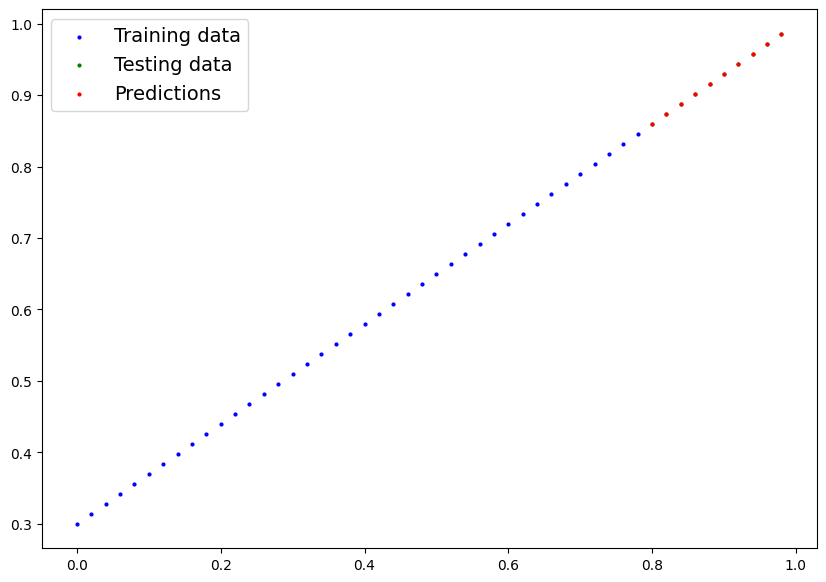

In [54]:
# Turn the model to evaluation mode
model_1.eval()
# Make predictions on the test data
with torch.inference_mode():
  test_preds  = model_1(X_test)

plot_prediction(predictions = test_preds.cpu())

In [43]:
test_preds

tensor([[0.9502],
        [0.9564],
        [0.9626],
        [0.9687],
        [0.9749],
        [0.9810],
        [0.9872],
        [0.9933],
        [0.9995],
        [1.0056]])